# GNOD Song Suggester

## Web Scraping Hot 100 from Billboard

 Scraping the current top 100 songs and their respective artists from https://www.billboard.com/charts/hot-100, and putting the information into a pandas dataframe.

In [1]:
# importing libraries

from bs4 import BeautifulSoup
import re 
import requests
import pandas as pd
from tqdm.notebook import tqdm
from random import randint

### Getting the info from the web

In [2]:
# storing link in a variable
url = "https://www.billboard.com/charts/hot-100"
# downloading  html with a get request
response = requests.get(url)
# check response status code 
response.status_code

200

In [3]:
# parsing and storing the contents of the url call
billboardsoup = BeautifulSoup(response.content, 'html.parser')
# prettifying the soup 
billboardsoup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/icon-144x

### Querying the soup to get song title & artist

In [4]:
# getting song title

billboardsoup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

'Easy On Me'

In [5]:
# getting artist

billboardsoup.select('span.c-label.a-font-primary-s')[0].get_text(strip=True)

'Adele'

In [6]:
# checking the amount of results

top_100 = len(billboardsoup.select('h3.c-title.a-no-trucate'))
top_100

100

In [7]:
# looping the songs

song = []
artist = []

for i in tqdm(range(top_100)):
    song.append(billboardsoup.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artist.append(billboardsoup.select('span.c-label.a-font-primary-s')[i].get_text(strip=True))

  0%|          | 0/100 [00:00<?, ?it/s]

### Getting the dataframe and storing it

In [8]:
billboard_top100 = pd.DataFrame({'song':song,'artist':artist})

In [9]:
billboard_top100.head()

,song,artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele


In [10]:
# billboard_top100.to_csv(r'billboard_top100.csv', index = False, header = True)

## Adding more songs: Scraping top 500 songs of all times from Rolling Stone

Because no one really likes the top 100 hot songs I'm going to be using the top 500 songs of all time from Rolling Stones (the 2004 version, not the 2021) from this website https://www.cs.ubc.ca/~davet/music/list/Best9.html

### Getting the info from the web

In [11]:
# storing link in a variable
url = "https://www.cs.ubc.ca/~davet/music/list/Best9.html"
# downloading  html with a get request
response = requests.get(url)
# check response status code 
response.status_code

200

In [12]:
# parsing and storing the contents of the url call
rollingsoup = BeautifulSoup(response.content, 'html.parser')
# prettifying the soup 
rollingsoup.prettify

<bound method Tag.prettify of <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="en-us" http-equiv="Content-Language"/>
<link href="../davetmusic.css" rel="stylesheet" title="davetmusic" type="text/css"/>
<script src="../playsamples.js" type="text/javascript"></script>
<title>Rolling Stone - 500 Greatest Songs (Music Database :: Dave Tompkins)</title>
</head>
<body>
<div class="menutitle"><a href="../../index.html">Dave Tompkins</a> :: <a href="../index.html">Music Database</a></div>
<div class="menurow">
<a class="singlemenu" href="../index.html">INTRODUCTION</a>
<a class="singlemenu" href="../disc/index.html">DISCS</a>
<a class="singlemenu" href="../covers/index.html">COVERS</a>
<a class="singlemenu" href="../genre/index.html">GENRE</a>
<a class="singlemenu" href="../artisttag/index.html">ARTIST TAGS</a>
<a class="singlemenu" href="../

### Querying the soup to get song title & artist

In [13]:
# getting artist

rollingsoup.select('td:nth-child(3) > a:nth-child(2)')[0].get_text(strip=True)

'Bob Dylan'

In [14]:
# getting song

rollingsoup.select('td:nth-child(4) > a')[0].get_text(strip=True)

'Like a Rolling Stone'

In [15]:
# checking the amount of results

best500 = len(rollingsoup.select('td:nth-child(4) > a'))
best500

500

In [16]:
# looping the songs

song = []
artist = []

for i in tqdm(range(best500)):
    song.append(rollingsoup.select('td:nth-child(4) > a')[i].get_text(strip=True))
    artist.append(rollingsoup.select('td:nth-child(3) > a:nth-child(2)')[i].get_text(strip=True))

  0%|          | 0/500 [00:00<?, ?it/s]

### Getting the dataframe and storing it

In [17]:
best_500 = pd.DataFrame({'song':song,'artist':artist})

In [18]:
best_500.head()

,song,artist
0,Like a Rolling Stone,Bob Dylan
1,Satisfaction,The Rolling Stones
2,Imagine,John Lennon
3,What's Going On,Marvin Gaye
4,Respect,Aretha Franklin


In [19]:
# best_500.to_csv(r'best_500.csv', index = False, header = True)

## Creating the suggester

### The input

In [20]:
def suggester():
    song = str(input("What song do you have in mind?: ").lower().replace(" ", ''))
    # check hot 100
    check = billboard_top100[billboard_top100['song'].str.lower().str.replace(" ","").str.contains(song)]
    # get index
    index = check.index.tolist()
    if len(check) == 0:
        print("Oh well, my bad, but that song is not Hot right now. Anyway! Good for you for not following the crowds!")
    else:
        answer1 = input("Are you thinking about '" + billboard_top100.song[index].values[0] + "' by '" + billboard_top100.artist[index].values[0] + "'? [y/n]: ")
    #make a song suggestion
        if answer1.lower() == 'y':
            suggestion = billboard_top100.sample().index.tolist()
            print("Then listen to '" + billboard_top100['song'][suggestion].item() + "' by '" + billboard_top100['artist'][suggestion].item() + "' I think you'll like it.")
        else:
            print("This song is not hot, good for you for not following the crowds!")
            
suggester()

What song do you have in mind?: de
Are you thinking about 'It's The Most Wonderful Time Of The Year' by 'Andy Williams'?: y
This song is not hot, good for you for not following the crowds!


In [21]:
def coolersuggester():
    song = str(input("What song do you have in mind?: ").lower().replace(" ", ''))
    
    #get the billboard record - if available
    check = best_500[best_500['song'].str.lower().str.replace(" ","").str.contains(song)]
    #get the index of the song in the entry
    index = check.index.tolist()
    
    #run the recommendation
    if len(check) == 0:
        print("Oh well, my bad, but that song is not on the best 500 songs of all times.")
    else:
        answer1 = input("Are you thinking about '" + best_500.song[index].values[0] + "' by '" + best_500.artist[index].values[0] + "'? [y/n]: ")
    #make a song suggestion
        if answer1.lower() == 'yes':
            suggestion = best_500.sample().index.tolist()
            print("Then listen to '" + best_500['song'][suggestion].item() + "' by '" + best_500['artist'][suggestion].item() + "' I think you'll like it.")
        else:
            print("That song is not on the best 500 songs of all times. Anyway, you should listen to that suggestion!")
            
coolersuggester()

What song do you have in mind?: th
Are you thinking about 'Blowin' in the Wind' by 'Bob Dylan'?: y
That song is not on the best 500 songs of all times. Anyway, you should listen to that suggestion!


## Spotipy (API Wrappers)

In [89]:
# more libraries, you can never have enough

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pprint

In [90]:
client_id = str(getpass.getpass('client_id: '))
client_secret = str(getpass.getpass('client_secret: '))
# embedding getpass credentials in the access key
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

client_id: ········
client_secret: ········


### Choosing some playlist to create a dataframe

### The 80's all lined up

In [92]:
first_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DXbB7yFaZiAQX")
first_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [93]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
first_results = get_tracks("Spotify", "37i9dQZF1DXbB7yFaZiAQX")

In [94]:
len(first_results)

150

In [95]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = first_results
for r in first_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  150 non-null    object
 1   song_id    150 non-null    object
 2   artist     150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [98]:
features_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:]))
features = pd.concat([features_info, features_info2])
features.reset_index(drop=True, inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      150 non-null    float64
 1   energy            150 non-null    float64
 2   key               150 non-null    int64  
 3   loudness          150 non-null    float64
 4   mode              150 non-null    int64  
 5   speechiness       150 non-null    float64
 6   acousticness      150 non-null    float64
 7   instrumentalness  150 non-null    float64
 8   liveness          150 non-null    float64
 9   valence           150 non-null    float64
 10  tempo             150 non-null    float64
 11  type              150 non-null    object 
 12  id                150 non-null    object 
 13  uri               150 non-null    object 
 14  track_href        150 non-null    object 
 15  analysis_url      150 non-null    object 
 16  duration_ms       150 non-null    int64  
 1

In [99]:
first_playlist = pd.concat([playlist_info, features], axis=1)
first_playlist.reset_index()
first_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         150 non-null    object 
 1   song_id           150 non-null    object 
 2   artist            150 non-null    object 
 3   danceability      150 non-null    float64
 4   energy            150 non-null    float64
 5   key               150 non-null    int64  
 6   loudness          150 non-null    float64
 7   mode              150 non-null    int64  
 8   speechiness       150 non-null    float64
 9   acousticness      150 non-null    float64
 10  instrumentalness  150 non-null    float64
 11  liveness          150 non-null    float64
 12  valence           150 non-null    float64
 13  tempo             150 non-null    float64
 14  type              150 non-null    object 
 15  id                150 non-null    object 
 16  uri               150 non-null    object 
 1

### All out 80s

In [108]:
second_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX4UtSsGT1Sbe")
second_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [109]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
second_results = get_tracks("Spotify", "37i9dQZF1DX4UtSsGT1Sbe")

In [110]:
len(second_results)

150

In [111]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = second_results
for r in second_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist2_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist2_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  150 non-null    object
 1   song_id    150 non-null    object
 2   artist     150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [112]:
features2_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features2_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:]))
features2 = pd.concat([features2_info, features2_info2])
features2.reset_index(drop=True, inplace=True)
features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      150 non-null    float64
 1   energy            150 non-null    float64
 2   key               150 non-null    int64  
 3   loudness          150 non-null    float64
 4   mode              150 non-null    int64  
 5   speechiness       150 non-null    float64
 6   acousticness      150 non-null    float64
 7   instrumentalness  150 non-null    float64
 8   liveness          150 non-null    float64
 9   valence           150 non-null    float64
 10  tempo             150 non-null    float64
 11  type              150 non-null    object 
 12  id                150 non-null    object 
 13  uri               150 non-null    object 
 14  track_href        150 non-null    object 
 15  analysis_url      150 non-null    object 
 16  duration_ms       150 non-null    int64  
 1

In [113]:
second_playlist = pd.concat([playlist2_info, features2], axis=1)
second_playlist.reset_index()
second_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         150 non-null    object 
 1   song_id           150 non-null    object 
 2   artist            150 non-null    object 
 3   danceability      150 non-null    float64
 4   energy            150 non-null    float64
 5   key               150 non-null    int64  
 6   loudness          150 non-null    float64
 7   mode              150 non-null    int64  
 8   speechiness       150 non-null    float64
 9   acousticness      150 non-null    float64
 10  instrumentalness  150 non-null    float64
 11  liveness          150 non-null    float64
 12  valence           150 non-null    float64
 13  tempo             150 non-null    float64
 14  type              150 non-null    object 
 15  id                150 non-null    object 
 16  uri               150 non-null    object 
 1

### Aestethic Lofi

In [114]:
third_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DXctgIf9k05Pu")
third_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [116]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
third_results = get_tracks("Spotify", "37i9dQZF1DXctgIf9k05Pu")

In [117]:
len(third_results)

50

In [119]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = third_results
for r in third_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist3_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist3_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  50 non-null     object
 1   song_id    50 non-null     object
 2   artist     50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [122]:
features3_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:]))
features3_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      50 non-null     float64
 1   energy            50 non-null     float64
 2   key               50 non-null     int64  
 3   loudness          50 non-null     float64
 4   mode              50 non-null     int64  
 5   speechiness       50 non-null     float64
 6   acousticness      50 non-null     float64
 7   instrumentalness  50 non-null     float64
 8   liveness          50 non-null     float64
 9   valence           50 non-null     float64
 10  tempo             50 non-null     float64
 11  type              50 non-null     object 
 12  id                50 non-null     object 
 13  uri               50 non-null     object 
 14  track_href        50 non-null     object 
 15  analysis_url      50 non-null     object 
 16  duration_ms       50 non-null     int64  
 17 

In [123]:
third_playlist = pd.concat([playlist3_info, features3_info], axis=1)
third_playlist.reset_index()
third_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         50 non-null     object 
 1   song_id           50 non-null     object 
 2   artist            50 non-null     object 
 3   danceability      50 non-null     float64
 4   energy            50 non-null     float64
 5   key               50 non-null     int64  
 6   loudness          50 non-null     float64
 7   mode              50 non-null     int64  
 8   speechiness       50 non-null     float64
 9   acousticness      50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  type              50 non-null     object 
 15  id                50 non-null     object 
 16  uri               50 non-null     object 
 17 

### Modern Chill Rock

In [124]:
fourth_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX2UXfvEIZvDK")
fourth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [125]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
fourth_results = get_tracks("Spotify", "37i9dQZF1DX2UXfvEIZvDK")

In [126]:
len(fourth_results)

60

In [127]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = fourth_results
for r in fourth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist4_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist4_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  60 non-null     object
 1   song_id    60 non-null     object
 2   artist     60 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [128]:
features4_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:]))
features4_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      60 non-null     float64
 1   energy            60 non-null     float64
 2   key               60 non-null     int64  
 3   loudness          60 non-null     float64
 4   mode              60 non-null     int64  
 5   speechiness       60 non-null     float64
 6   acousticness      60 non-null     float64
 7   instrumentalness  60 non-null     float64
 8   liveness          60 non-null     float64
 9   valence           60 non-null     float64
 10  tempo             60 non-null     float64
 11  type              60 non-null     object 
 12  id                60 non-null     object 
 13  uri               60 non-null     object 
 14  track_href        60 non-null     object 
 15  analysis_url      60 non-null     object 
 16  duration_ms       60 non-null     int64  
 17 

In [129]:
fourth_playlist = pd.concat([playlist4_info, features4_info], axis=1)
fourth_playlist.reset_index()
fourth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         60 non-null     object 
 1   song_id           60 non-null     object 
 2   artist            60 non-null     object 
 3   danceability      60 non-null     float64
 4   energy            60 non-null     float64
 5   key               60 non-null     int64  
 6   loudness          60 non-null     float64
 7   mode              60 non-null     int64  
 8   speechiness       60 non-null     float64
 9   acousticness      60 non-null     float64
 10  instrumentalness  60 non-null     float64
 11  liveness          60 non-null     float64
 12  valence           60 non-null     float64
 13  tempo             60 non-null     float64
 14  type              60 non-null     object 
 15  id                60 non-null     object 
 16  uri               60 non-null     object 
 17 

### Soulful Blend

In [130]:
fifth_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX8Md3JnnrexB")
fifth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [131]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
fifth_results = get_tracks("Spotify", "37i9dQZF1DX8Md3JnnrexB")

In [132]:
len(fifth_results)

100

In [133]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = fifth_results
for r in fifth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist5_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist5_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  100 non-null    object
 1   song_id    100 non-null    object
 2   artist     100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [134]:
features5_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:]))
features5_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      100 non-null    float64
 1   energy            100 non-null    float64
 2   key               100 non-null    int64  
 3   loudness          100 non-null    float64
 4   mode              100 non-null    int64  
 5   speechiness       100 non-null    float64
 6   acousticness      100 non-null    float64
 7   instrumentalness  100 non-null    float64
 8   liveness          100 non-null    float64
 9   valence           100 non-null    float64
 10  tempo             100 non-null    float64
 11  type              100 non-null    object 
 12  id                100 non-null    object 
 13  uri               100 non-null    object 
 14  track_href        100 non-null    object 
 15  analysis_url      100 non-null    object 
 16  duration_ms       100 non-null    int64  
 17

In [136]:
fifth_playlist = pd.concat([playlist5_info, features5_info], axis=1)
fifth_playlist.reset_index()
fifth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         100 non-null    object 
 1   song_id           100 non-null    object 
 2   artist            100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    int64  
 6   loudness          100 non-null    float64
 7   mode              100 non-null    int64  
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  type              100 non-null    object 
 15  id                100 non-null    object 
 16  uri               100 non-null    object 
 17

### Morning Coffee

In [137]:
sixth_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DXcgZcN2HVMoe")
sixth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [138]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
sixth_results = get_tracks("Spotify", "37i9dQZF1DXcgZcN2HVMoe")

In [139]:
len(sixth_results)

250

In [140]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = sixth_results
for r in sixth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist6_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist6_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  250 non-null    object
 1   song_id    250 non-null    object
 2   artist     250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [143]:
features6_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features6_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features6_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:]))
features6 = pd.concat([features6_info, features6_info2, features6_info3])
features6.reset_index(drop=True, inplace=True)
features6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      250 non-null    float64
 1   energy            250 non-null    float64
 2   key               250 non-null    int64  
 3   loudness          250 non-null    float64
 4   mode              250 non-null    int64  
 5   speechiness       250 non-null    float64
 6   acousticness      250 non-null    float64
 7   instrumentalness  250 non-null    float64
 8   liveness          250 non-null    float64
 9   valence           250 non-null    float64
 10  tempo             250 non-null    float64
 11  type              250 non-null    object 
 12  id                250 non-null    object 
 13  uri               250 non-null    object 
 14  track_href        250 non-null    object 
 15  analysis_url      250 non-null    object 
 16  duration_ms       250 non-null    int64  
 1

In [144]:
sixth_playlist = pd.concat([playlist6_info, features6], axis=1)
sixth_playlist.reset_index()
sixth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         250 non-null    object 
 1   song_id           250 non-null    object 
 2   artist            250 non-null    object 
 3   danceability      250 non-null    float64
 4   energy            250 non-null    float64
 5   key               250 non-null    int64  
 6   loudness          250 non-null    float64
 7   mode              250 non-null    int64  
 8   speechiness       250 non-null    float64
 9   acousticness      250 non-null    float64
 10  instrumentalness  250 non-null    float64
 11  liveness          250 non-null    float64
 12  valence           250 non-null    float64
 13  tempo             250 non-null    float64
 14  type              250 non-null    object 
 15  id                250 non-null    object 
 16  uri               250 non-null    object 
 1

### 500 best songs of all times

In [145]:
seventh_playlist = sp.user_playlist_tracks("Arian", "5dxn0i8MPl6XFVVxNatd6U")
seventh_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [146]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
seventh_results = get_tracks("Arian", "5dxn0i8MPl6XFVVxNatd6U")

In [148]:
len(seventh_results)

500

In [149]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = seventh_results
for r in seventh_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist7_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist7_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  500 non-null    object
 1   song_id    500 non-null    object
 2   artist     500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [151]:
features7_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features7_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features7_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features7_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features7_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features7_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:]))
features7 = pd.concat([features7_info, features7_info2, features7_info3, features7_info4, features7_info5, features7_info6])
features7.reset_index(drop=True, inplace=True)
features7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      500 non-null    float64
 1   energy            500 non-null    float64
 2   key               500 non-null    int64  
 3   loudness          500 non-null    float64
 4   mode              500 non-null    int64  
 5   speechiness       500 non-null    float64
 6   acousticness      500 non-null    float64
 7   instrumentalness  500 non-null    float64
 8   liveness          500 non-null    float64
 9   valence           500 non-null    float64
 10  tempo             500 non-null    float64
 11  type              500 non-null    object 
 12  id                500 non-null    object 
 13  uri               500 non-null    object 
 14  track_href        500 non-null    object 
 15  analysis_url      500 non-null    object 
 16  duration_ms       500 non-null    int64  
 1

In [152]:
seventh_playlist = pd.concat([playlist7_info, features7], axis=1)
seventh_playlist.reset_index()
seventh_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         500 non-null    object 
 1   song_id           500 non-null    object 
 2   artist            500 non-null    object 
 3   danceability      500 non-null    float64
 4   energy            500 non-null    float64
 5   key               500 non-null    int64  
 6   loudness          500 non-null    float64
 7   mode              500 non-null    int64  
 8   speechiness       500 non-null    float64
 9   acousticness      500 non-null    float64
 10  instrumentalness  500 non-null    float64
 11  liveness          500 non-null    float64
 12  valence           500 non-null    float64
 13  tempo             500 non-null    float64
 14  type              500 non-null    object 
 15  id                500 non-null    object 
 16  uri               500 non-null    object 
 1

### Best fo the Oldies

In [153]:
eighth_playlist = sp.user_playlist_tracks("Marcel", "6OAF6gkxAe4lqHdSLmGpdd")
eighth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [154]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
eighth_results = get_tracks("Marcel", "6OAF6gkxAe4lqHdSLmGpdd")

In [155]:
len(eighth_results)

1049

In [156]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = eighth_results
for r in eighth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist8_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist8_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  1049 non-null   object
 1   song_id    1049 non-null   object
 2   artist     1049 non-null   object
dtypes: object(3)
memory usage: 24.7+ KB


In [157]:
features8_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features8_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features8_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features8_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features8_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features8_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:599]))
features8_info7 = pd.DataFrame(sp.audio_features(tracks = song_id[599:699]))
features8_info8 = pd.DataFrame(sp.audio_features(tracks = song_id[699:799]))
features8_info9 = pd.DataFrame(sp.audio_features(tracks = song_id[799:899]))
features8_info10 = pd.DataFrame(sp.audio_features(tracks = song_id[899:999]))
features8_info11 = pd.DataFrame(sp.audio_features(tracks = song_id[999:]))
features8 = pd.concat([features8_info, features8_info2, features8_info3, features8_info4, features8_info5, features8_info6, features8_info7, features8_info8, features8_info9, features8_info10, features8_info11])
features8.reset_index(drop=True, inplace=True)
features8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1049 non-null   float64
 1   energy            1049 non-null   float64
 2   key               1049 non-null   int64  
 3   loudness          1049 non-null   float64
 4   mode              1049 non-null   int64  
 5   speechiness       1049 non-null   float64
 6   acousticness      1049 non-null   float64
 7   instrumentalness  1049 non-null   float64
 8   liveness          1049 non-null   float64
 9   valence           1049 non-null   float64
 10  tempo             1049 non-null   float64
 11  type              1049 non-null   object 
 12  id                1049 non-null   object 
 13  uri               1049 non-null   object 
 14  track_href        1049 non-null   object 
 15  analysis_url      1049 non-null   object 
 16  duration_ms       1049 non-null   int64  


In [158]:
eighth_playlist = pd.concat([playlist8_info, features8], axis=1)
eighth_playlist.reset_index()
eighth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         1049 non-null   object 
 1   song_id           1049 non-null   object 
 2   artist            1049 non-null   object 
 3   danceability      1049 non-null   float64
 4   energy            1049 non-null   float64
 5   key               1049 non-null   int64  
 6   loudness          1049 non-null   float64
 7   mode              1049 non-null   int64  
 8   speechiness       1049 non-null   float64
 9   acousticness      1049 non-null   float64
 10  instrumentalness  1049 non-null   float64
 11  liveness          1049 non-null   float64
 12  valence           1049 non-null   float64
 13  tempo             1049 non-null   float64
 14  type              1049 non-null   object 
 15  id                1049 non-null   object 
 16  uri               1049 non-null   object 


### 1001 songs you need to hear before you die

In [159]:
ninth_playlist = sp.user_playlist_tracks("Jimmy Alexander", "6aCHA5HeRfz5gJjllGZ7Of")
ninth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [160]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
ninth_results = get_tracks("Jimmy Alexander", "6aCHA5HeRfz5gJjllGZ7Of")

In [161]:
len(ninth_results)

1032

In [162]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = ninth_results
for r in ninth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist9_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist9_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  1032 non-null   object
 1   song_id    1032 non-null   object
 2   artist     1032 non-null   object
dtypes: object(3)
memory usage: 24.3+ KB


In [163]:
features9_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features9_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features9_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features9_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features9_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features9_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:599]))
features9_info7 = pd.DataFrame(sp.audio_features(tracks = song_id[599:699]))
features9_info8 = pd.DataFrame(sp.audio_features(tracks = song_id[699:799]))
features9_info9 = pd.DataFrame(sp.audio_features(tracks = song_id[799:899]))
features9_info10 = pd.DataFrame(sp.audio_features(tracks = song_id[899:999]))
features9_info11 = pd.DataFrame(sp.audio_features(tracks = song_id[999:]))
features9 = pd.concat([features9_info, features9_info2, features9_info3, features9_info4, features9_info5, features9_info6, features9_info7, features9_info8, features9_info9, features9_info10, features9_info11])
features9.reset_index(drop=True, inplace=True)
features9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1032 non-null   float64
 1   energy            1032 non-null   float64
 2   key               1032 non-null   int64  
 3   loudness          1032 non-null   float64
 4   mode              1032 non-null   int64  
 5   speechiness       1032 non-null   float64
 6   acousticness      1032 non-null   float64
 7   instrumentalness  1032 non-null   float64
 8   liveness          1032 non-null   float64
 9   valence           1032 non-null   float64
 10  tempo             1032 non-null   float64
 11  type              1032 non-null   object 
 12  id                1032 non-null   object 
 13  uri               1032 non-null   object 
 14  track_href        1032 non-null   object 
 15  analysis_url      1032 non-null   object 
 16  duration_ms       1032 non-null   int64  


In [164]:
ninth_playlist = pd.concat([playlist9_info, features9], axis=1)
ninth_playlist.reset_index()
ninth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         1032 non-null   object 
 1   song_id           1032 non-null   object 
 2   artist            1032 non-null   object 
 3   danceability      1032 non-null   float64
 4   energy            1032 non-null   float64
 5   key               1032 non-null   int64  
 6   loudness          1032 non-null   float64
 7   mode              1032 non-null   int64  
 8   speechiness       1032 non-null   float64
 9   acousticness      1032 non-null   float64
 10  instrumentalness  1032 non-null   float64
 11  liveness          1032 non-null   float64
 12  valence           1032 non-null   float64
 13  tempo             1032 non-null   float64
 14  type              1032 non-null   object 
 15  id                1032 non-null   object 
 16  uri               1032 non-null   object 


### The ultimate huge playlist

In [ ]:
https://open.spotify.com/playlist/20JT4SnBRiiXBeIXr5f2c0?si=907bc186b8294cec

In [180]:
tenth_playlist = sp.user_playlist_tracks("AROL", "20JT4SnBRiiXBeIXr5f2c0")
tenth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [181]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
tenth_results = get_tracks("AROL", "20JT4SnBRiiXBeIXr5f2c0")

In [182]:
len(tenth_results)

4698

In [183]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = tenth_results
for r in tenth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist10_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist10_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  4698 non-null   object
 1   song_id    4698 non-null   object
 2   artist     4698 non-null   object
dtypes: object(3)
memory usage: 110.2+ KB


In [184]:
features10_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features10_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features10_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features10_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features10_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features10_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:599]))
features10_info7 = pd.DataFrame(sp.audio_features(tracks = song_id[599:699]))
features10_info8 = pd.DataFrame(sp.audio_features(tracks = song_id[699:799]))
features10_info9 = pd.DataFrame(sp.audio_features(tracks = song_id[799:899]))
features10_info10 = pd.DataFrame(sp.audio_features(tracks = song_id[899:999]))
features10_info11 = pd.DataFrame(sp.audio_features(tracks = song_id[999:1099]))
features10_info12 = pd.DataFrame(sp.audio_features(tracks = song_id[1099:1199]))
features10_info13 = pd.DataFrame(sp.audio_features(tracks = song_id[1199:1299]))
features10_info14 = pd.DataFrame(sp.audio_features(tracks = song_id[1299:1399]))
features10_info15 = pd.DataFrame(sp.audio_features(tracks = song_id[1399:1499]))
features10_info16 = pd.DataFrame(sp.audio_features(tracks = song_id[1499:1599]))
features10_info17 = pd.DataFrame(sp.audio_features(tracks = song_id[1599:1699]))
features10_info18 = pd.DataFrame(sp.audio_features(tracks = song_id[1699:1799]))
features10_info19 = pd.DataFrame(sp.audio_features(tracks = song_id[1799:1899]))
features10_info20 = pd.DataFrame(sp.audio_features(tracks = song_id[1899:1999]))
features10_info21 = pd.DataFrame(sp.audio_features(tracks = song_id[1999:2099]))
features10_info22 = pd.DataFrame(sp.audio_features(tracks = song_id[2099:2199]))
features10_info23 = pd.DataFrame(sp.audio_features(tracks = song_id[2199:2299]))
features10_info24 = pd.DataFrame(sp.audio_features(tracks = song_id[2299:2399]))
features10_info25 = pd.DataFrame(sp.audio_features(tracks = song_id[2399:2499]))
features10_info26 = pd.DataFrame(sp.audio_features(tracks = song_id[2499:2599]))
features10_info27 = pd.DataFrame(sp.audio_features(tracks = song_id[2599:2699]))
features10_info28 = pd.DataFrame(sp.audio_features(tracks = song_id[2699:2799]))
features10_info29 = pd.DataFrame(sp.audio_features(tracks = song_id[2799:2899]))
features10_info30 = pd.DataFrame(sp.audio_features(tracks = song_id[2899:2999]))
features10_info31 = pd.DataFrame(sp.audio_features(tracks = song_id[2999:3099]))
features10_info32 = pd.DataFrame(sp.audio_features(tracks = song_id[3099:3199]))
features10_info33 = pd.DataFrame(sp.audio_features(tracks = song_id[3199:3299]))
features10_info34 = pd.DataFrame(sp.audio_features(tracks = song_id[3299:3399]))
features10_info35 = pd.DataFrame(sp.audio_features(tracks = song_id[3399:3499]))
features10_info36 = pd.DataFrame(sp.audio_features(tracks = song_id[3499:3599]))
features10_info37 = pd.DataFrame(sp.audio_features(tracks = song_id[3599:3699]))
features10_info38 = pd.DataFrame(sp.audio_features(tracks = song_id[3699:3799]))
features10_info39 = pd.DataFrame(sp.audio_features(tracks = song_id[3799:3899]))
features10_info40 = pd.DataFrame(sp.audio_features(tracks = song_id[3899:3999]))
features10_info41 = pd.DataFrame(sp.audio_features(tracks = song_id[3999:4099]))
features10_info42 = pd.DataFrame(sp.audio_features(tracks = song_id[4099:4199]))
features10_info43 = pd.DataFrame(sp.audio_features(tracks = song_id[4199:4299]))
features10_info44 = pd.DataFrame(sp.audio_features(tracks = song_id[4299:4399]))
features10_info45 = pd.DataFrame(sp.audio_features(tracks = song_id[4399:4499]))
features10_info46 = pd.DataFrame(sp.audio_features(tracks = song_id[4499:4599]))
features10_info47 = pd.DataFrame(sp.audio_features(tracks = song_id[4599:]))
features10 = pd.concat([features9_info, features10_info2, features10_info3, features10_info4, 
                        features10_info5, features10_info6, features10_info7, features10_info8, 
                        features10_info9, features10_info10, features10_info11, features10_info12, 
                        features10_info13, features10_info14, features10_info15, features10_info16, 
                        features10_info17, features10_info18, features10_info19, features10_info20, 
                        features10_info21, features10_info22, features10_info23, features10_info24, 
                        features10_info25, features10_info26, features10_info27, features10_info28, 
                        features10_info29, features10_info30, features10_info31, features10_info32, 
                        features10_info33, features10_info34, features10_info35, features10_info36, 
                        features10_info37, features10_info38, features10_info39, features10_info40, 
                        features10_info41, features10_info42, features10_info43, features10_info44, 
                        features10_info45, features10_info46, features10_info47])
features10.reset_index(drop=True, inplace=True)
features10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4698 non-null   float64
 1   energy            4698 non-null   float64
 2   key               4698 non-null   int64  
 3   loudness          4698 non-null   float64
 4   mode              4698 non-null   int64  
 5   speechiness       4698 non-null   float64
 6   acousticness      4698 non-null   float64
 7   instrumentalness  4698 non-null   float64
 8   liveness          4698 non-null   float64
 9   valence           4698 non-null   float64
 10  tempo             4698 non-null   float64
 11  type              4698 non-null   object 
 12  id                4698 non-null   object 
 13  uri               4698 non-null   object 
 14  track_href        4698 non-null   object 
 15  analysis_url      4698 non-null   object 
 16  duration_ms       4698 non-null   int64  


In [185]:
tenth_playlist = pd.concat([playlist10_info, features10], axis=1)
tenth_playlist.reset_index()
tenth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         4698 non-null   object 
 1   song_id           4698 non-null   object 
 2   artist            4698 non-null   object 
 3   danceability      4698 non-null   float64
 4   energy            4698 non-null   float64
 5   key               4698 non-null   int64  
 6   loudness          4698 non-null   float64
 7   mode              4698 non-null   int64  
 8   speechiness       4698 non-null   float64
 9   acousticness      4698 non-null   float64
 10  instrumentalness  4698 non-null   float64
 11  liveness          4698 non-null   float64
 12  valence           4698 non-null   float64
 13  tempo             4698 non-null   float64
 14  type              4698 non-null   object 
 15  id                4698 non-null   object 
 16  uri               4698 non-null   object 


### Creating the big dataframe

In [186]:
huge_playlist = pd.concat([first_playlist, second_playlist, third_playlist, fourth_playlist, 
                           fifth_playlist, sixth_playlist, seventh_playlist, eighth_playlist, 
                           ninth_playlist, tenth_playlist])
huge_playlist.reset_index(drop=True, inplace=True)
huge_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039 entries, 0 to 8038
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         8039 non-null   object 
 1   song_id           8039 non-null   object 
 2   artist            8039 non-null   object 
 3   danceability      7989 non-null   float64
 4   energy            7989 non-null   float64
 5   key               7989 non-null   float64
 6   loudness          7989 non-null   float64
 7   mode              7989 non-null   float64
 8   speechiness       7989 non-null   float64
 9   acousticness      7989 non-null   float64
 10  instrumentalness  7989 non-null   float64
 11  liveness          7989 non-null   float64
 12  valence           7989 non-null   float64
 13  tempo             7989 non-null   float64
 14  type              7989 non-null   object 
 15  id                7989 non-null   object 
 16  uri               7989 non-null   object 


In [187]:
# count duplicated values
huge_playlist.duplicated(subset='song_name', keep='first').sum()

1168

In [246]:
huge_playlist = huge_playlist.drop_duplicates()
huge_playlist.reset_index(drop=True, inplace=True)
huge_playlist = huge_playlist.dropna()
huge_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7587 entries, 0 to 7586
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         7587 non-null   object 
 1   song_id           7587 non-null   object 
 2   artist            7587 non-null   object 
 3   danceability      7587 non-null   float64
 4   energy            7587 non-null   float64
 5   key               7587 non-null   float64
 6   loudness          7587 non-null   float64
 7   mode              7587 non-null   float64
 8   speechiness       7587 non-null   float64
 9   acousticness      7587 non-null   float64
 10  instrumentalness  7587 non-null   float64
 11  liveness          7587 non-null   float64
 12  valence           7587 non-null   float64
 13  tempo             7587 non-null   float64
 14  type              7587 non-null   object 
 15  id                7587 non-null   object 
 16  uri               7587 non-null   object 


In [189]:
huge_playlist.to_csv('huge_playlist.csv')

## Clustering

In [247]:
# even MORE packages!
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go
from sklearn.cluster import KMeans 
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 

In [249]:
# copying the playlist just in case
hugeplaylist=huge_playlist.copy()

In [250]:
# dropping extra columns, leaving only the song to use later as index
hugeplaylist.drop(['artist', 'song_id', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'type'], axis = 1, inplace = True)

In [251]:
hugeplaylist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7587 entries, 0 to 7586
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         7587 non-null   object 
 1   danceability      7587 non-null   float64
 2   energy            7587 non-null   float64
 3   key               7587 non-null   float64
 4   loudness          7587 non-null   float64
 5   mode              7587 non-null   float64
 6   speechiness       7587 non-null   float64
 7   acousticness      7587 non-null   float64
 8   instrumentalness  7587 non-null   float64
 9   liveness          7587 non-null   float64
 10  valence           7587 non-null   float64
 11  tempo             7587 non-null   float64
dtypes: float64(11), object(1)
memory usage: 770.6+ KB


### A little bit of... EDA

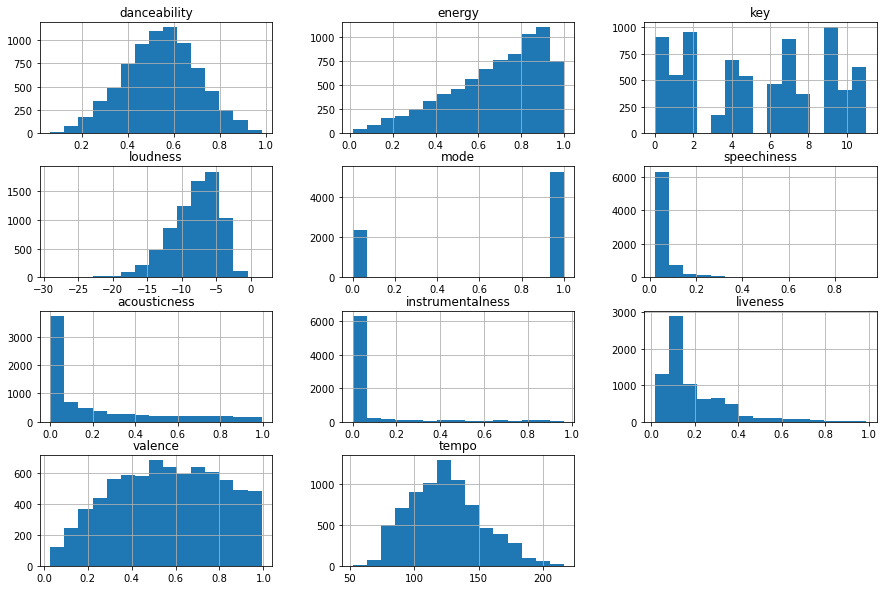

In [252]:
#look at the distribution 
hugeplaylist.hist(bins=15, figsize=(15,10));

In [253]:
# Song as index! yay!
hugeplaylist.index=hugeplaylist.iloc[:,0]
# pick first column and turn it to index [:,_] - location

In [254]:
#keep rest of columns
hugeplaylist=hugeplaylist.iloc[:,1:]

In [255]:
# remove the header name
hugeplaylist.rename_axis(None,inplace=True)

In [256]:
hugeplaylist.head()
# such a pretty table

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Road to Nowhere - 2005 Remaster,0.654,0.789,2.0,-4.901,1.0,0.0322,0.040400,0.000013,0.1190,0.579,110.378
She Sells Sanctuary,0.550,0.765,7.0,-8.684,1.0,0.0287,0.000005,0.873000,0.1320,0.417,139.453
It's My Life - 1997 Remaster,0.627,0.802,0.0,-8.432,1.0,0.0348,0.197000,0.784000,0.4040,0.867,126.283
Close To Me,0.724,0.523,11.0,-11.139,1.0,0.1160,0.074500,0.703000,0.0811,0.965,185.075
China Girl - 2018 Remaster,0.651,0.699,4.0,-7.867,0.0,0.0277,0.039000,0.065900,0.1240,0.832,133.793


### Scaling

In [257]:
hugeplaylist_scaled=StandardScaler().fit_transform(hugeplaylist)

In [258]:
hugeplaylist_scaled.shape

(7587, 11)

In [259]:
hugeplaylist_scaled_df=pd.DataFrame(hugeplaylist_scaled,columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

In [260]:
hugeplaylist_scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.686733,0.481357,-0.931651,0.888254,0.668016,-0.525486,-0.630847,-0.383056,-0.479607,0.078587,-0.489660
1,0.035801,0.373074,0.466931,-0.162314,0.668016,-0.585175,-0.773648,4.086253,-0.395135,-0.591691,0.550643
2,0.517741,0.540010,-1.491084,-0.092332,0.668016,-0.481145,-0.077254,3.630612,1.372286,1.270190,0.079421
3,1.124860,-0.718777,1.585797,-0.844087,0.668016,0.903652,-0.510301,3.215928,-0.725876,1.675666,2.182996
4,0.667956,0.075297,-0.372218,0.064573,-1.496971,-0.602229,-0.635797,-0.045743,-0.447118,1.125377,0.348128


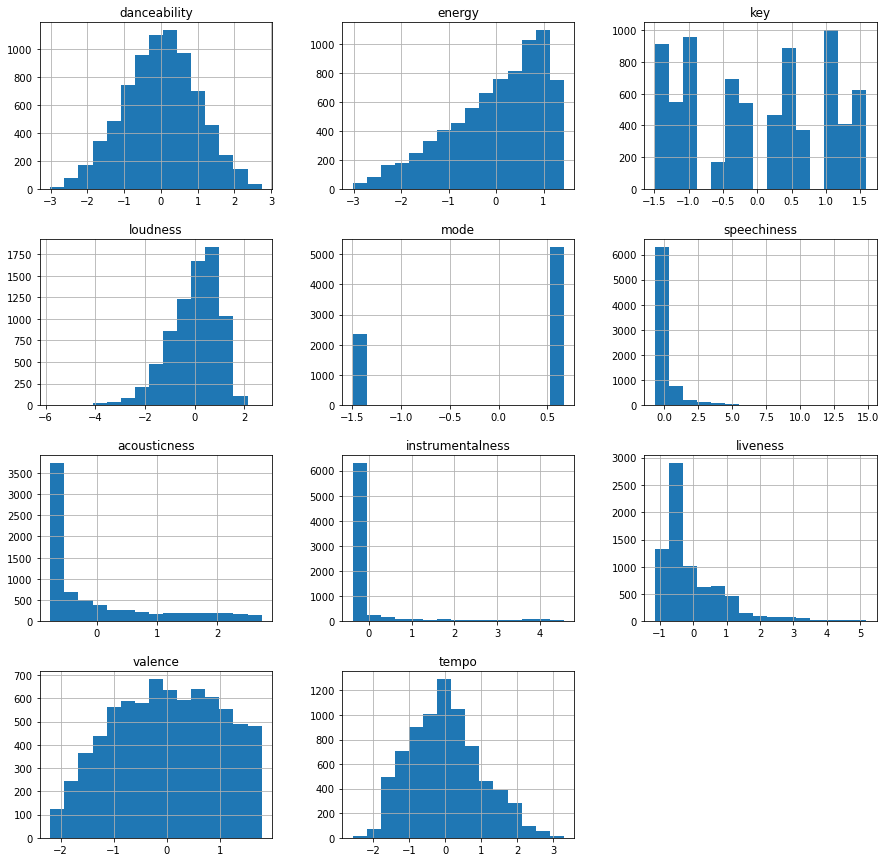

In [261]:
hugeplaylist_scaled_df.hist(bins=15, figsize=(15,15));

In [222]:
hugeplaylist_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03,7.587000e+03
mean,-5.045244e-16,9.011874e-16,-2.705830e-16,1.600144e-17,1.650716e-15,1.154269e-16,1.733745e-16,-2.140695e-16,9.031628e-17,3.572410e-16,1.333526e-16
std,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00
min,-3.007933e+00,-3.020687e+00,-1.491084e+00,-5.810334e+00,-1.496971e+00,-6.909109e-01,-7.736612e-01,-3.831220e-01,-1.145639e+00,-2.196632e+00,-2.581214e+00
25%,-6.839801e-01,-6.556117e-01,-9.316507e-01,-5.990099e-01,-1.496971e+00,-5.084315e-01,-7.545577e-01,-3.831130e-01,-6.459525e-01,-7.902912e-01,-7.529467e-01
50%,2.328273e-02,2.061384e-01,-9.250145e-02,1.642699e-01,6.680155e-01,-3.378901e-01,-5.201994e-01,-3.819957e-01,-4.016325e-01,1.238631e-02,-3.929738e-02
75%,6.867328e-01,8.242523e-01,1.026364e+00,7.507886e-01,6.680155e-01,3.730108e-02,5.095702e-01,-3.186156e-01,4.235971e-01,8.233388e-01,6.088925e-01
max,2.739673e+00,1.428831e+00,1.585797e+00,2.689466e+00,6.680155e-01,1.487100e+01,2.743742e+00,4.557252e+00,5.173541e+00,1.787379e+00,3.300226e+00


## Clustering

In [265]:
kmeans=KMeans(n_clusters=50)
#have to set a starting cluster number 

In [266]:
cluster=kmeans.fit(hugeplaylist_scaled_df)

In [267]:
cluster.cluster_centers_

array([[ 4.53325631e-01, -2.98021778e-01,  8.20461854e-01,
        -3.22241314e-01,  6.37946277e-01, -2.56101250e-01,
         1.37861134e+00, -2.88616166e-01,  6.37098362e-02,
         9.62750009e-01,  3.89173820e-02],
       [-7.29284422e-01,  5.68177110e-01,  8.12002103e-01,
         3.32083188e-01,  6.68015537e-01, -1.27893007e-01,
        -5.80023843e-01, -2.65123757e-01, -3.73394091e-01,
         4.73254963e-01,  1.35632014e+00],
       [ 5.84178683e-01,  6.09839076e-01,  8.34615154e-01,
         6.02286588e-01,  6.68015537e-01, -2.64701892e-01,
        -4.21309091e-01, -3.16584884e-01, -4.76289140e-01,
         1.02867933e+00, -2.49408220e-01],
       [-7.55762540e-01,  8.89602594e-01,  1.82844399e-01,
         8.68688543e-01,  9.29409432e-02,  3.37117297e+00,
        -5.63773169e-01, -1.40332047e-01,  3.46556755e-01,
        -4.94536588e-01,  1.15933656e+00],
       [-8.78896963e-01,  4.10629676e-01,  6.91022376e-01,
         3.86778443e-01,  6.68015537e-01, -1.74383479e-01,
  

In [268]:
cluster.labels_

array([33, 29, 38, ...,  8, 42, 48], dtype=int32)

In [269]:
#bring cluster into data frame
hugeplaylist_cluster=hugeplaylist.copy()
hugeplaylist_cluster['cluster']=cluster.labels_

In [271]:
hugeplaylist_cluster.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Road to Nowhere - 2005 Remaster,0.654,0.789,2.0,-4.901,1.0,0.0322,0.040400,0.000013,0.1190,0.579,110.378,33
She Sells Sanctuary,0.550,0.765,7.0,-8.684,1.0,0.0287,0.000005,0.873000,0.1320,0.417,139.453,29
It's My Life - 1997 Remaster,0.627,0.802,0.0,-8.432,1.0,0.0348,0.197000,0.784000,0.4040,0.867,126.283,38
Close To Me,0.724,0.523,11.0,-11.139,1.0,0.1160,0.074500,0.703000,0.0811,0.965,185.075,8
China Girl - 2018 Remaster,0.651,0.699,4.0,-7.867,0.0,0.0277,0.039000,0.065900,0.1240,0.832,133.793,22


### Visualizing clusters yay!

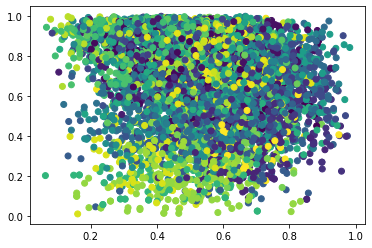

In [275]:
plt.scatter(hugeplaylist_cluster.iloc[:,0],hugeplaylist_cluster.iloc[:,1],c = hugeplaylist_cluster.iloc[:,11])
# y = danceability, x = energy, colour = cluster

#### Now in 3D!

In [276]:
hugeplaylist_cluster.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Road to Nowhere - 2005 Remaster,0.654,0.789,2.0,-4.901,1.0,0.0322,0.0404,0.000013,0.119,0.579,110.378,33


In [279]:
markersize = hugeplaylist_cluster['energy']
markercolour = hugeplaylist_cluster['cluster']

fig1 = go.Scatter3d(x = hugeplaylist_cluster['danceability'],
                  y = hugeplaylist_cluster['loudness'],
                  z = hugeplaylist_cluster['acousticness'],
                 marker = dict (size = markersize,
                              color = markercolour,
                              opacity = 0.9,
                              colorscale = 'Blues'),
                 line = dict (width = 0.2),
                 mode = 'markers')
# making the layout 
mylayout = go.Layout(scene = dict(xaxis = dict(title = 'danceability'),
                                  yaxis = dict(title = 'loudness'),
                                  zaxis = dict(title = 'acousticness')))

### Finding the right number of clusters - KMeans

In [281]:
kmeans.inertia_

27104.825227765745

In [283]:
kmeans = KMeans(n_clusters = 60)
kmeans.fit(hugeplaylist_scaled_df)
print(kmeans.inertia_)

25656.64738383226


In [284]:
K = range(2,100)
# range of k to consider

In [285]:
# gathering the inertia values
inertia = []
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 40)
    kmeans.fit(hugeplaylist_scaled_df) # scaled version
    inertia.append(kmeans.inertia_)
    
print(inertia)
# gives you a list of inertias

[70466.57282148216, 63793.53585818102, 58801.692988714014, 54478.868268378355, 50777.45212647834, 48009.197838233624, 45990.57561413568, 44394.12124011314, 42947.86691548118, 41845.02319359181, 40749.04695823085, 39838.75892945945, 39030.44418740878, 38238.43525324503, 37651.378247197055, 37173.69544088564, 36461.043468469434, 35920.79959552367, 35483.759978493996, 34992.992661800396, 34451.860233296975, 34082.56677404939, 33543.331850289134, 33252.14470184689, 32832.31283134299, 32402.893957156535, 32178.31989932882, 31804.411422648252, 31537.458524838385, 31136.447700029574, 30873.778664689173, 30639.920744608902, 30347.779973603407, 30124.427394451006, 29843.637230175576, 29563.245659359396, 29441.37072541118, 29189.036718484305, 28972.56860773432, 28707.197369120357, 28623.72541000035, 28367.7956012149, 28195.150743623315, 28025.815307604968, 27811.245261589975, 27656.80217190145, 27484.065680335483, 27260.241985462817, 27097.95547967533, 26957.34904323573, 26830.397881720775, 2659

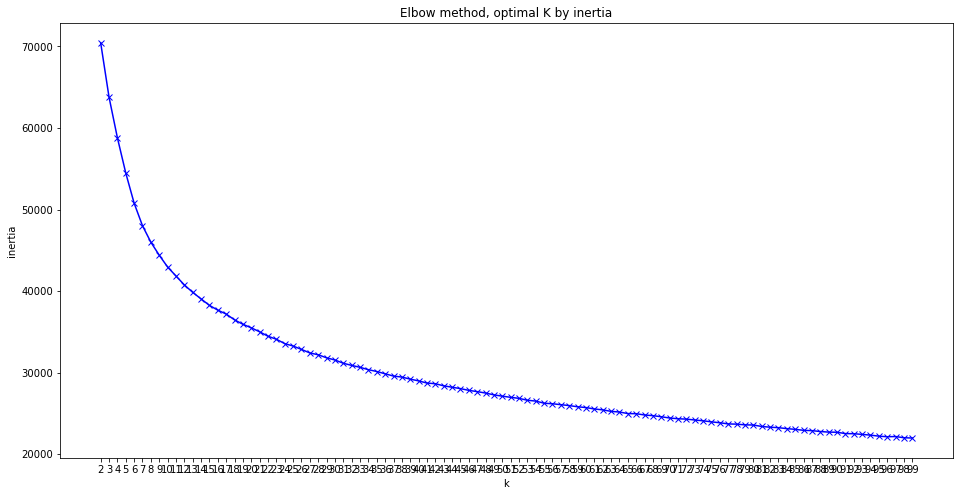

In [286]:
# plotting it
plt.figure(figsize = (16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K) + 1, 1.0))
plt.title('Elbow method, optimal K by inertia');